In [ ]:
!pip install pyaf

In [69]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds

%matplotlib inline

In [83]:
import datetime
from datetime import date

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths','new_deaths','hosp_patients']]
df.columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths','new_deaths','hosp_patients']
df = df[df['location'] == 'United States']
df = df[(df['date'] > '2020-03-02')] # hosp = 2020-03-16
df2 = df.loc[:,['date','new_cases']]
df2['new_cases'] = np.log2(df2['new_cases'])
df2['date'] = df2['date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
df_tr = df2[:-14]

In [ ]:
lEngine = autof.cForecastEngine()
#lEngine.mOptions.mDebugCycles = False
lEngine.train(df_tr , 'date' , 'new_cases', 14);

In [ ]:
lEngine.mOptions.set_active_autoregressions(['XGB']);
lEngine.train(df_tr , 'date' , 'new_deaths', 14);

In [ ]:
print(lEngine.mSignalDecomposition.mTrPerfDetails.to_latex());

In [62]:
def highlight_min(data, color='yellow'):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    #data = data.replace('%','', regex=True).astype(float)
    data = data.replace('%','', regex=True)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)

lEngine.mSignalDecomposition.mTrPerfDetails.style.apply(highlight_min).to_excel('Results.xlsx')

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 0.7471415996551514


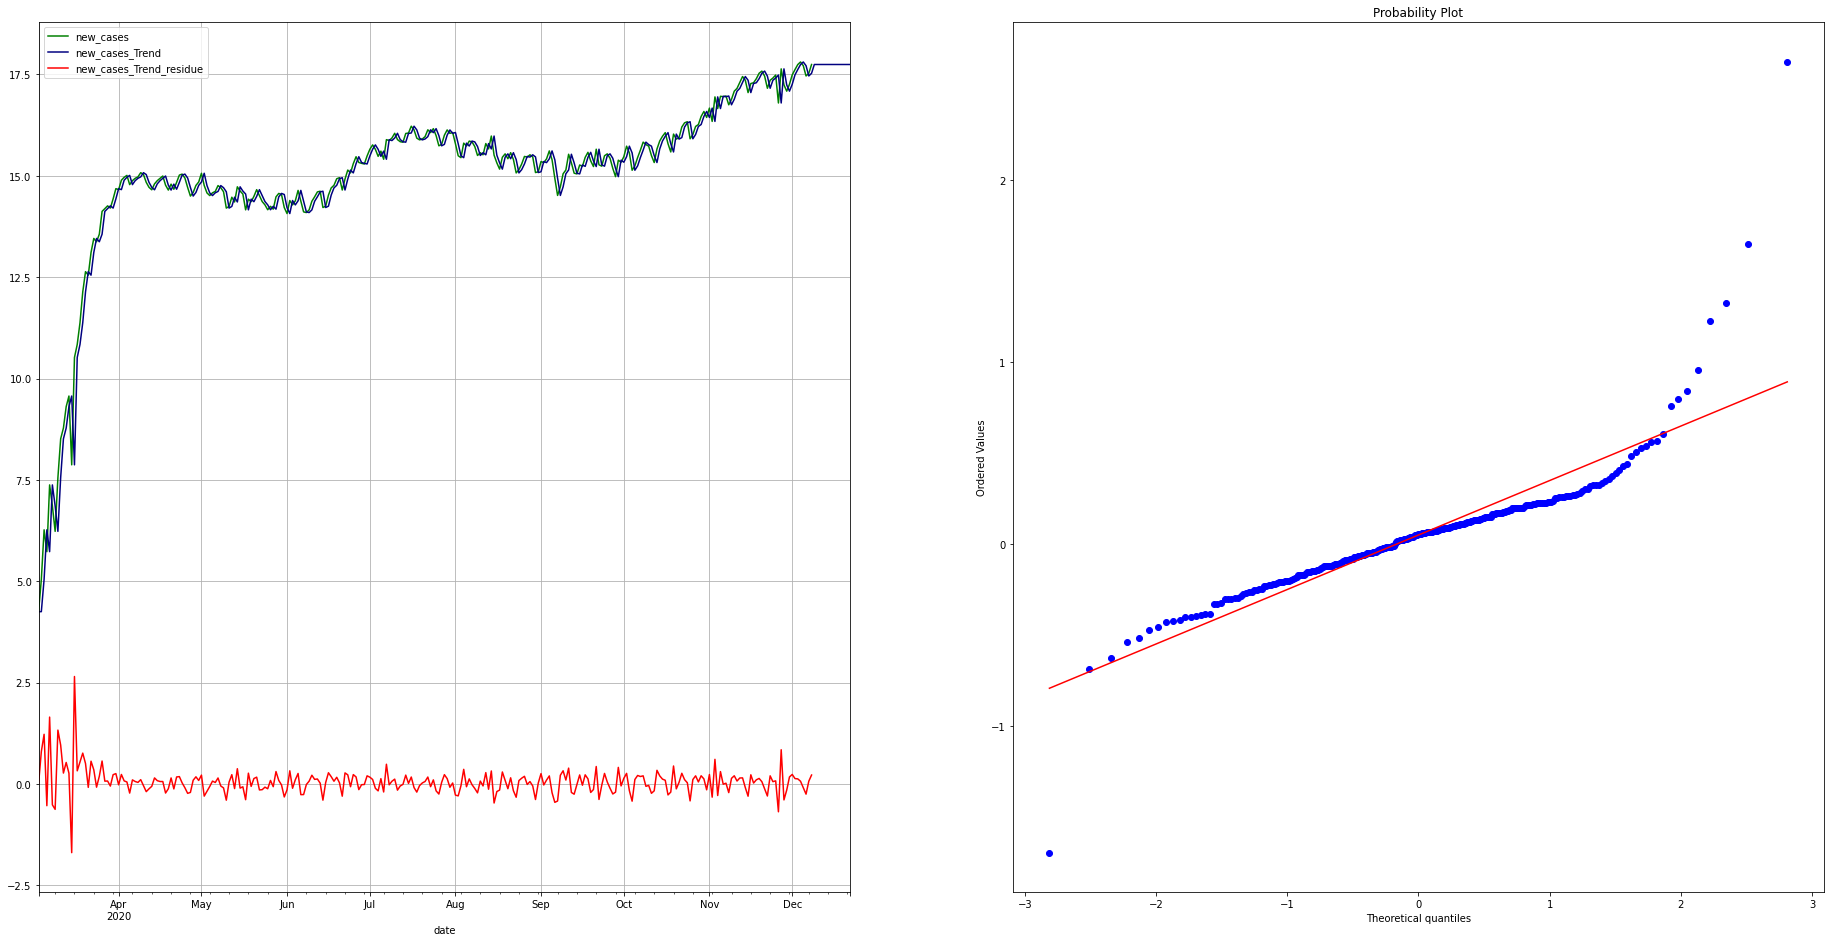

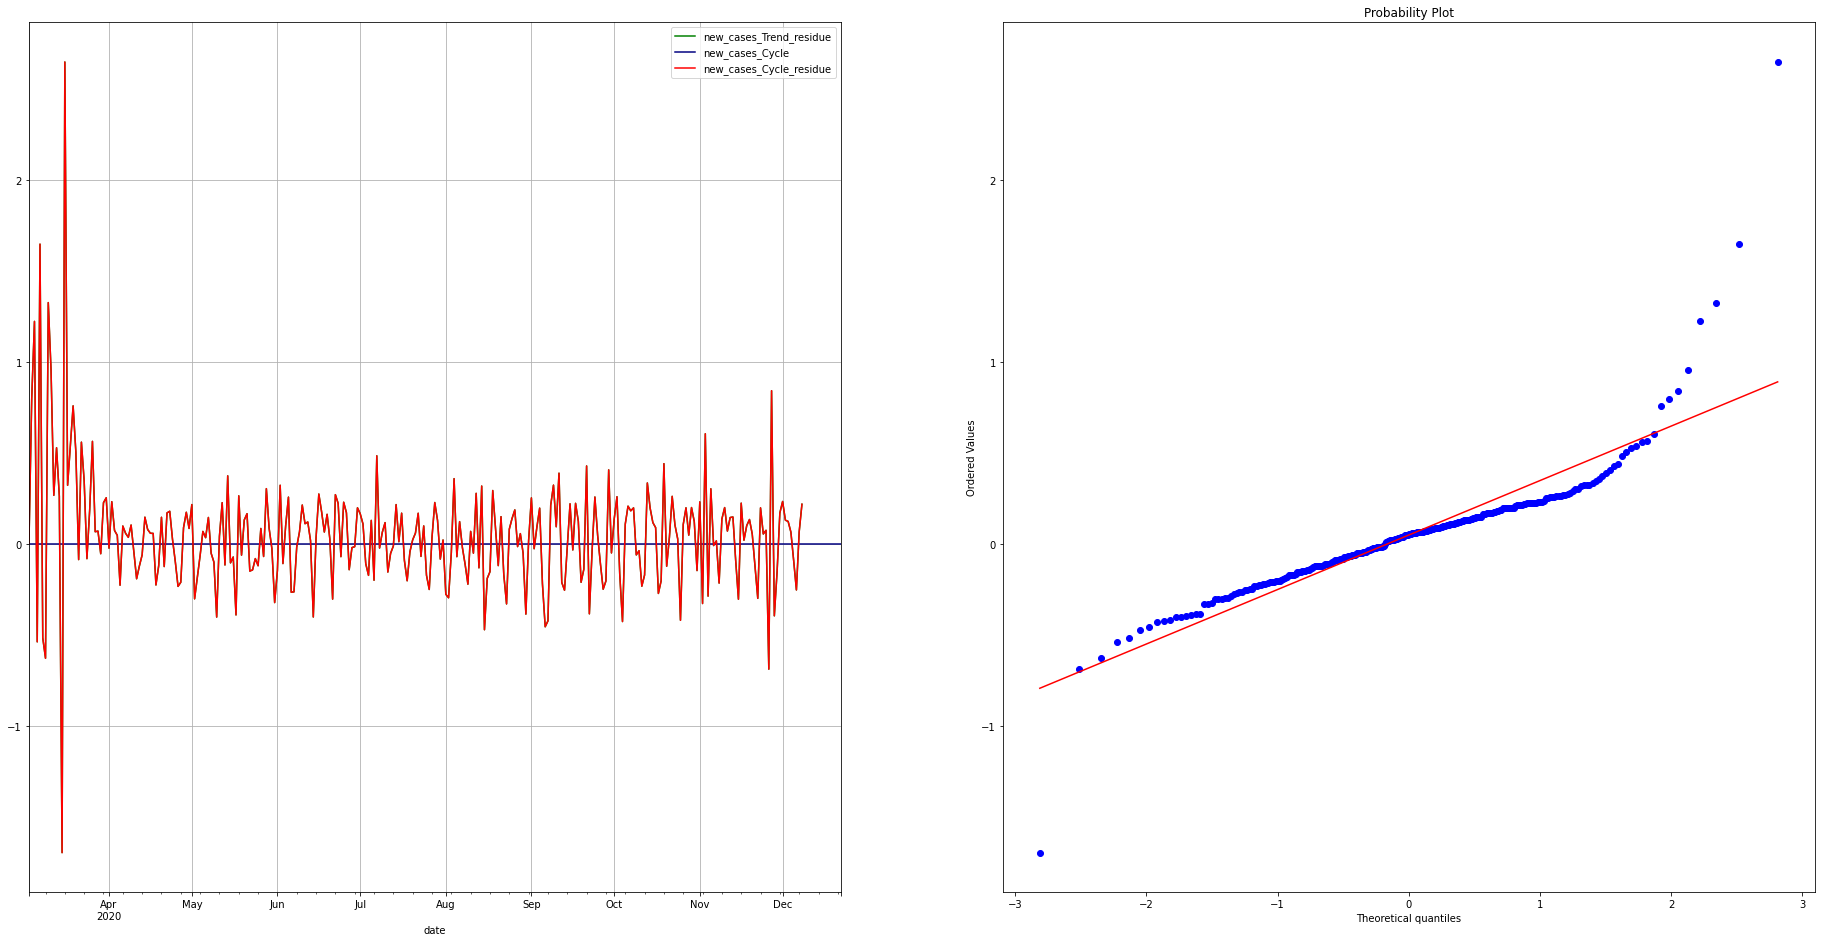

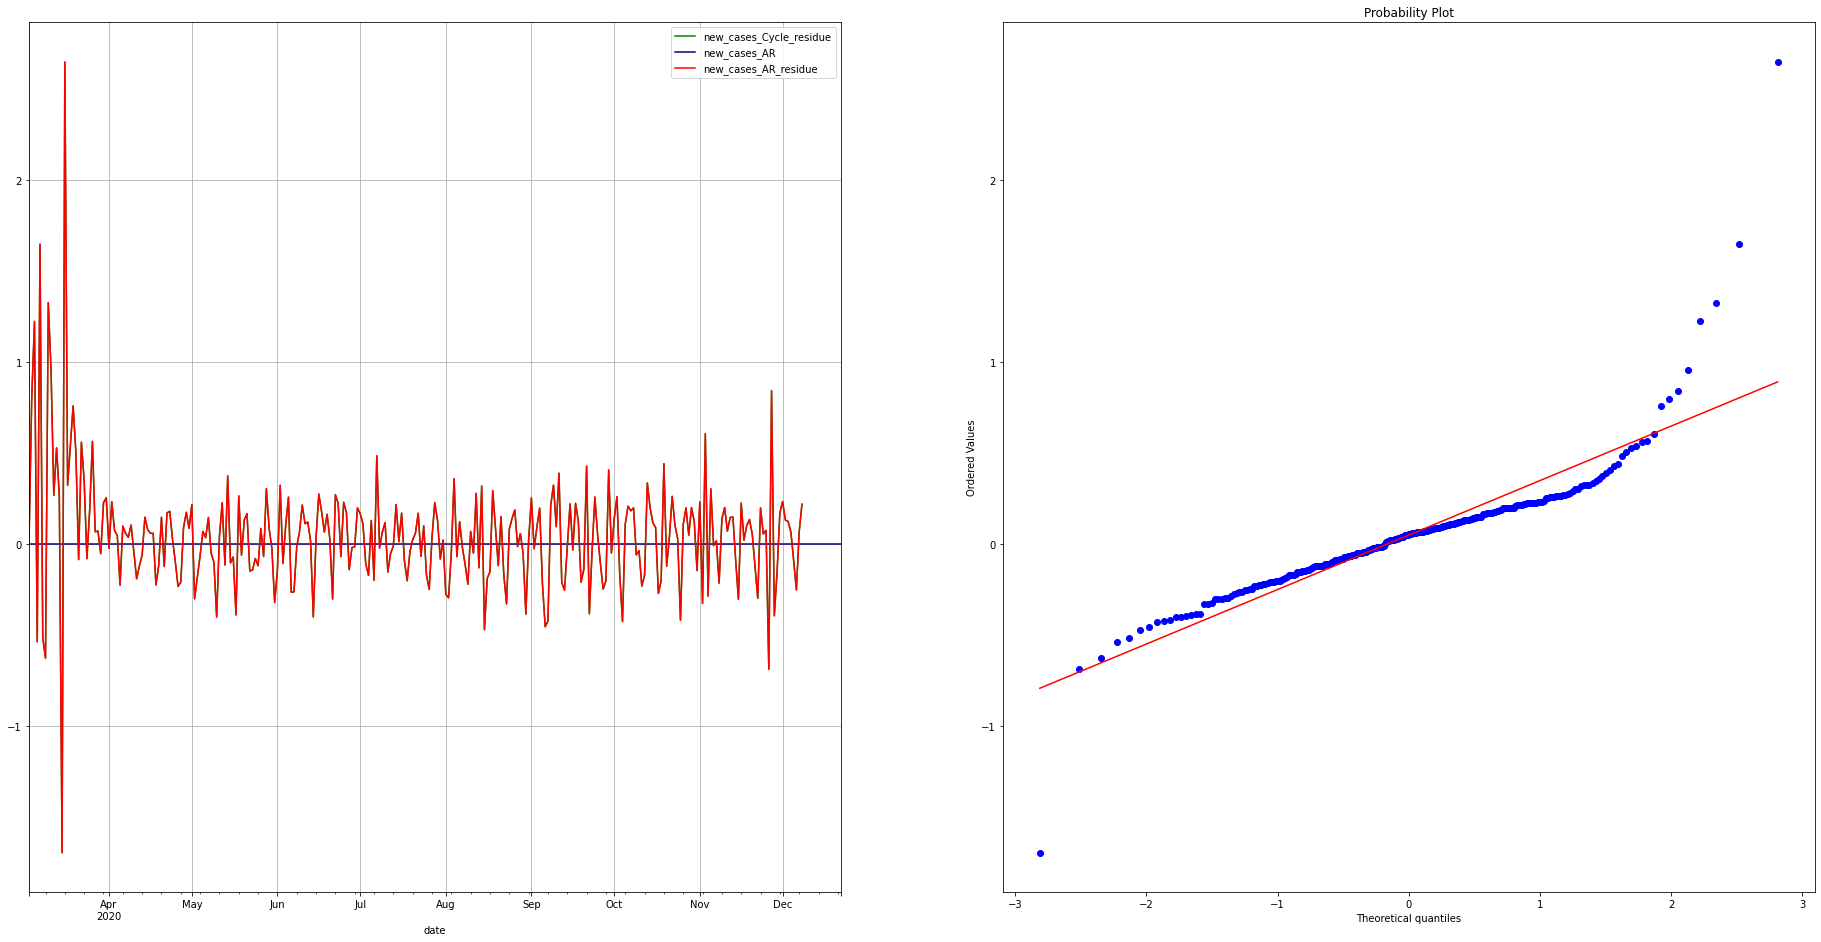

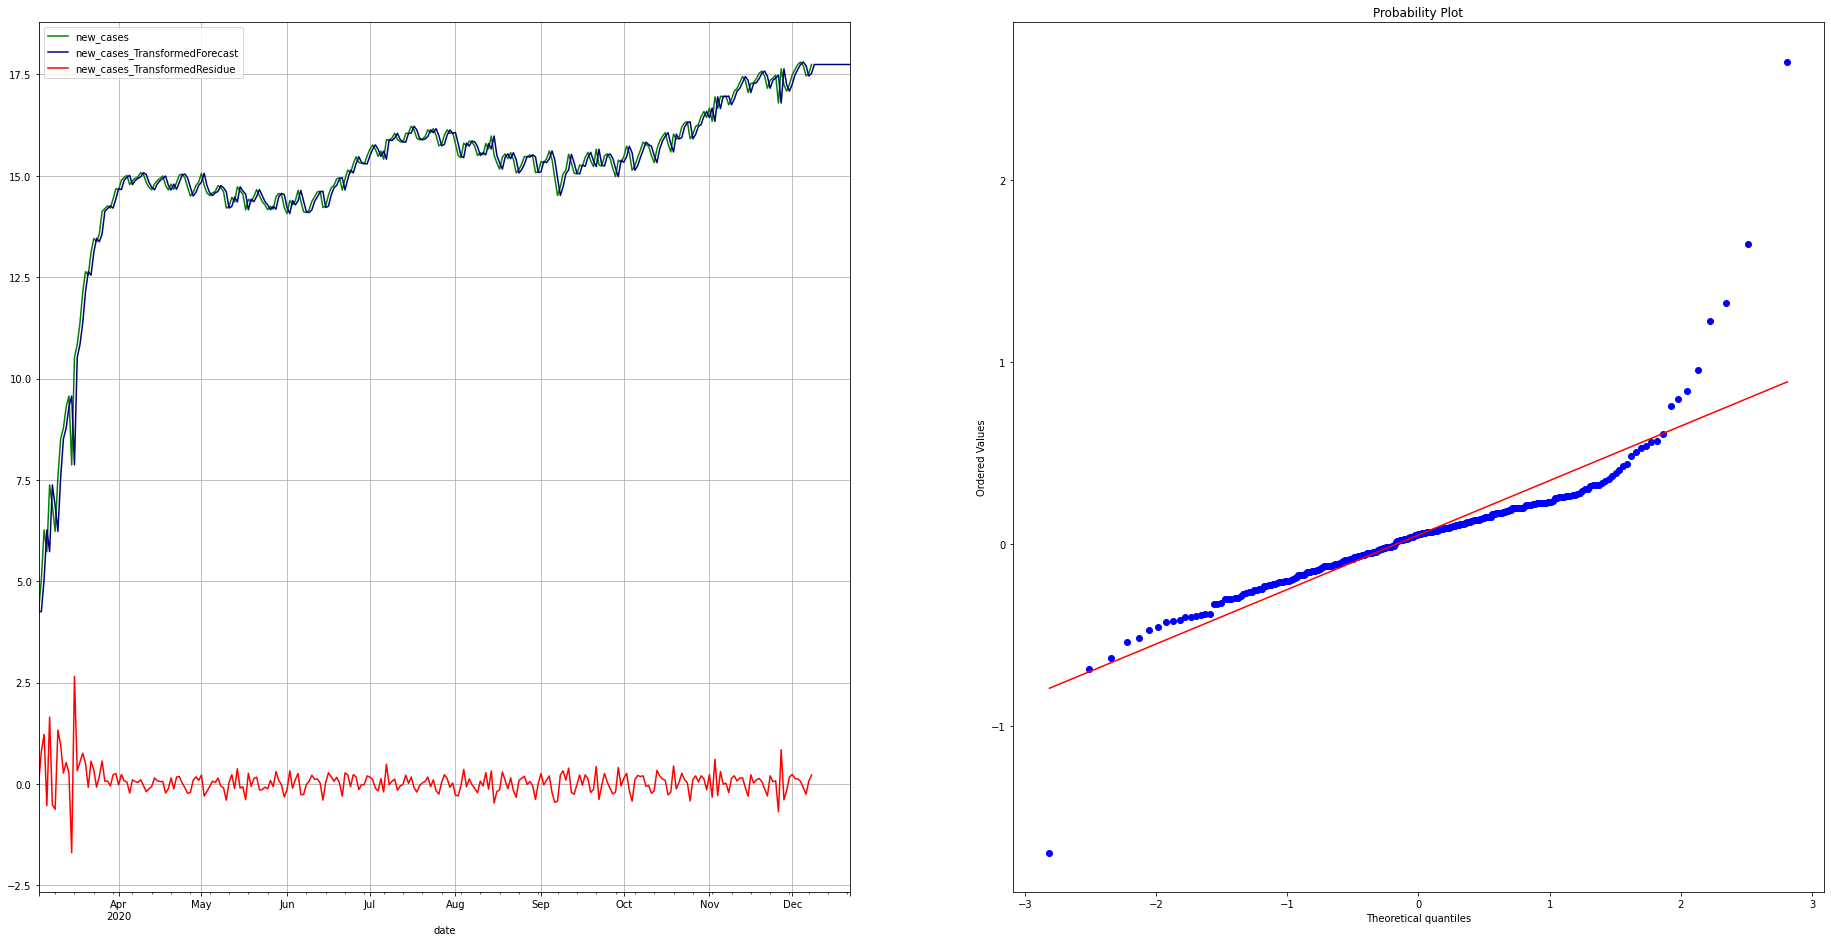

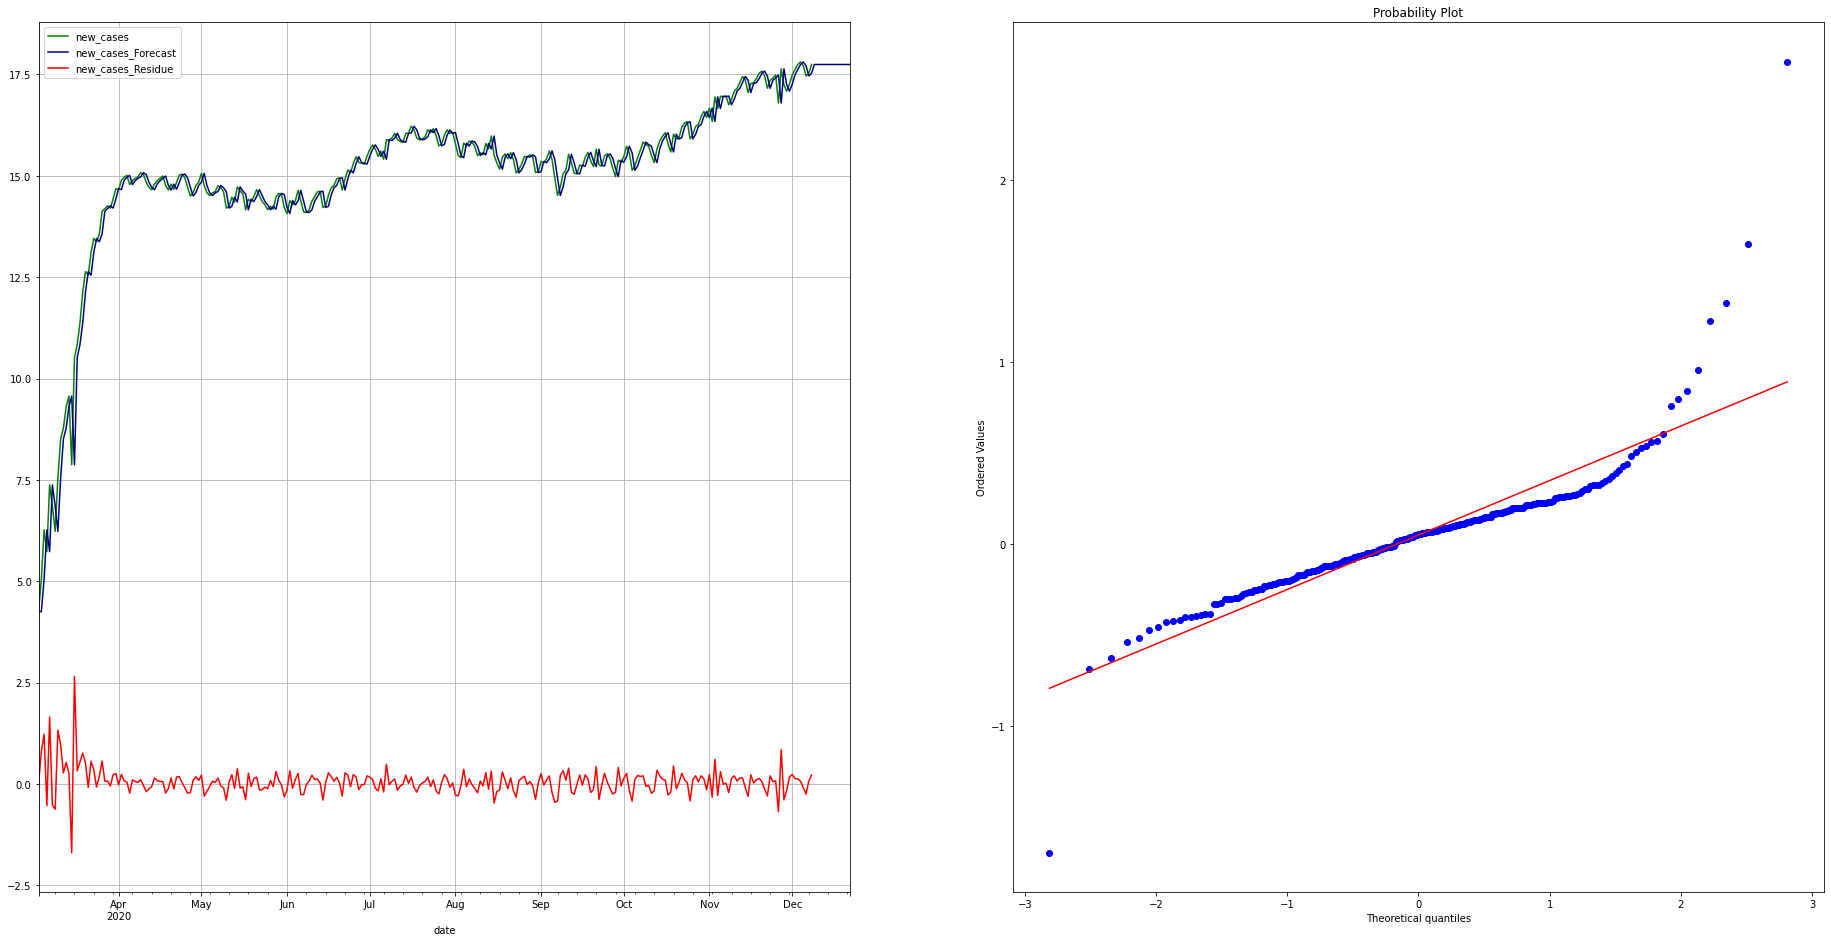

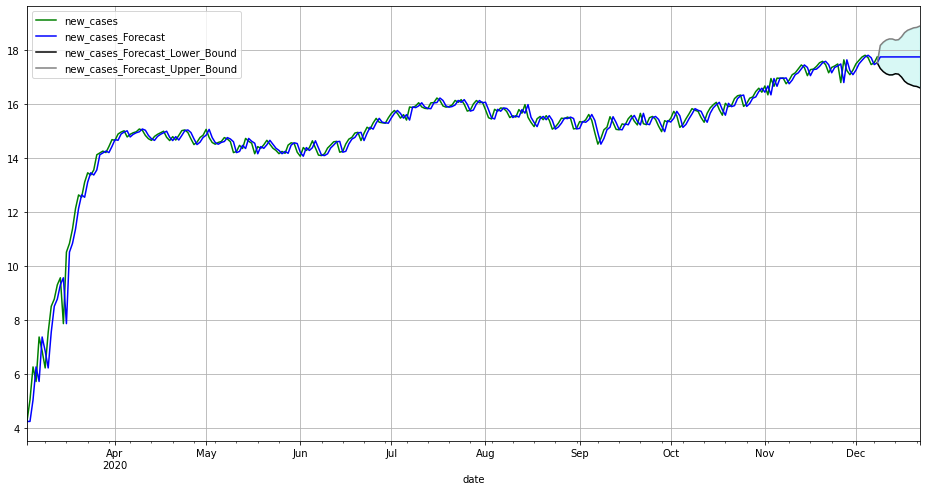

In [87]:
lEngine.standardPlots()

In [ ]:
dfapp = df2.copy();
dfapp1 = lEngine.forecast(dfapp, 15);
dfapp1.tail(15)